# <center> Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning <center>

In [ ]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from datetime import date


In [ ]:
# version checking

print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('seaborn version:', sns.__version__)

pandas version: 1.3.5
numpy version: 1.21.6
seaborn version: 0.11.2


In [ ]:
# Mounting to Google Drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Miniproject/Customer Behavior/marketing_campaign_data.csv'

In [ ]:
df = pd.read_csv(path)
pd.set_option('display.max_columns', None)

df.sample(7)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
661,661,7093,1985,S1,Menikah,19986000.0,1,0,14-11-2013,74,3000,6000,5000,0,2000,6000,1,0,0,3,7,0,0,0,0,0,0,3,11,0
327,327,3896,1984,S1,Menikah,27255000.0,1,0,07-11-2013,3,22000,1000,11000,0,1000,2000,1,1,0,3,7,0,0,0,0,0,0,3,11,0
1156,1156,967,1976,S1,Menikah,46049000.0,1,1,21-07-2013,11,342000,9000,112000,19000,14000,19000,10,5,2,9,7,0,0,0,0,0,0,3,11,1
548,548,9671,1968,S1,Menikah,19514000.0,1,1,26-01-2014,47,14000,3000,21000,2000,1000,28000,4,3,1,2,8,1,0,0,0,0,0,3,11,1
205,205,624,1984,S2,Lajang,18890000.0,0,0,10-11-2012,5,6000,4000,1000,7000,2000,15000,1,0,1,2,6,1,0,0,0,0,0,3,11,1
652,652,6661,1974,S1,Menikah,67445000.0,0,1,12-08-2012,63,757000,80000,217000,29000,80000,11000,5,9,6,12,6,0,0,0,0,0,0,3,11,0
274,274,10967,1963,S1,Cerai,33378000.0,1,1,06-02-2013,38,33000,6000,40000,3000,7000,10000,3,2,0,4,7,0,0,0,0,0,0,3,11,0


In [ ]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ',df.shape[1])

Number of rows:  2240
Number of columns:  30


## 1. EDA

**A. Descriptive Analysis**

### Check Dtypes

In [ ]:
# check dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
# Grouping Features based on Data types:

nums = df.select_dtypes(include = [np.number]).columns # numerical columns
cats = df.select_dtypes(exclude = [np.number]).columns # categorical columns

### Statistical Summary

In [ ]:
# check statistical summary (numeric)

df[nums].describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,44021.875000,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,52167.438915,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# check statistical summary (categorcial)

df[cats].describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,6,663
top,S1,Menikah,31-08-2012
freq,1127,864,12


In [ ]:
# check value counts @ categorical columns

for i in cats:
    print(df[i].value_counts())

S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 663, dtype: int64


In [ ]:
# change datatype of Dt_Customer from object to datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df[cats].dtypes

Education                 object
Marital_Status            object
Dt_Customer       datetime64[ns]
dtype: object

### Missing Values

In [ ]:
# check missing values

df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# check percentage

missing_income = df['Income'].isna().sum() * 100 / len(df)
print('missing values in income: ', df['Income'].isna().sum(), 'or about', round(missing_income, 4),  '% of total rows')

missing values in income:  24 or about 1.0714 % of total rows


### Check Duplicated Rows

In [ ]:
df.duplicated().sum()

0

No duplicated rows found.

### Summary

In [ ]:
list = []

for col in df.columns:
    list.append([col, df[col].dtype, df[col].isna().sum(), df[col].isna().sum()*100/len(df), df[col].nunique()])

df_summary = pd.DataFrame( data = list, columns = ['Column Name', 'Type', 'Null Values', '% Null Values', 'Number of Unique Values'])
df_summary

,Column Name,Type,Null Values,% Null Values,Number of Unique Values
0,Unnamed: 0,int64,0,0.000000,2240
1,ID,int64,0,0.000000,2240
2,Year_Birth,int64,0,0.000000,59
3,Education,object,0,0.000000,5
4,Marital_Status,object,0,0.000000,6
5,Income,float64,24,1.071429,1974
6,Kidhome,int64,0,0.000000,3
7,Teenhome,int64,0,0.000000,3
8,Dt_Customer,datetime64[ns],0,0.000000,663
9,Recency,int64,0,0.000000,100


## 2. Feature Extraction

### Create Age and Age Group

In [ ]:
df1 = df.copy()
df1.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# create 'Age' columns
df1['Age'] = 2023 - df1['Year_Birth']

# create 'Age_Group'
age_list = []

for i in df1['Age']:
    if i <= 12:
        group = 'Anak-Anak'
    elif i <= 20:
        group = 'Remaja'
    elif i <= 64:
        group = 'Dewasa'
    else:
        group = 'Lansia'
    age_list.append(group)
    
df1['Age_Group'] = age_list

In [ ]:
df1['Age_Group'].value_counts()

Dewasa    1721
Lansia     519
Name: Age_Group, dtype: int64

### Create Conversion Rate (CvR) Feature

In [ ]:
# Create total purchases feature

df1['Total_Purchases'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumStorePurchases'] + df1['NumCatalogPurchases']

In [ ]:
# create multiplication function

def div (x,y):
    if y == 0:
        return 0
    return x/y

In [ ]:
# Create CvR feature
df1['CvR'] = df1.apply(lambda x: div(x['Total_Purchases'], x['NumWebVisitsMonth']), axis = 1)

### Create Total_Accepted_Campaign

In [ ]:
# Create total accepted campaign feature

df1['Total_Acc_Cmp'] = df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5'] + df1['AcceptedCmp1'] + df1['AcceptedCmp2']

### Create Number of Children

In [ ]:
#create ammount of children feature
df1['NumChildren'] = df1['Kidhome']+df1['Teenhome']

### Create Total Spending

In [ ]:
df1['Total_Spent'] = df1['MntCoke']+df1['MntFishProducts']+df1['MntFruits']+df1['MntMeatProducts']+df1['MntSweetProducts']+df1['MntGoldProds']

### Create Total Days of Customer Joined

In [ ]:
#create total of days joined
df1['Dt_Today'] = pd.to_datetime('today')
df1['Dt_Today'] = df1['Dt_Today'].astype('datetime64[ns]')
df1['Days_Customer_Joined'] = df1['Dt_Today'] - df1['Dt_Customer']
df1['Days_Customer_Joined'] = df1['Days_Customer_Joined'].dt.days

In [ ]:
df1.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Age_Group,Total_Purchases,CvR,Total_Acc_Cmp,NumChildren,Total_Spent,Dt_Today,Days_Customer_Joined
0,0,5524,1957,S1,Lajang,58138000.0,0,0,2012-04-09,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66,Lansia,25,3.571429,0,0,1617000,2023-01-20 06:54:05.341706,3938
1,1,2174,1954,S1,Lajang,46344000.0,1,1,2014-08-03,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69,Lansia,6,1.200000,0,2,27000,2023-01-20 06:54:05.341706,3092
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58,Dewasa,21,5.250000,0,0,776000,2023-01-20 06:54:05.341706,3439
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-10-02,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39,Dewasa,8,1.333333,0,1,53000,2023-01-20 06:54:05.341706,3032
4,4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42,Dewasa,19,3.800000,0,1,422000,2023-01-20 06:54:05.341706,3288


### Drop Unnecessary Features

In [ ]:
df1.drop(['Unnamed: 0', 'ID', 'Year_Birth', 'Z_CostContact', 'Z_Revenue', 'Dt_Today'], inplace=True, axis=1)

## Univariate Analysis

In [ ]:
num1 = df1.select_dtypes(include = [np.number]).columns
cat1 = df1.select_dtypes(exclude = [np.number]).columns

print('Num columns: ' , num1)
print('Cat columns: ',cat1)

Num columns:  Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Purchases', 'CvR',
       'Total_Acc_Cmp', 'NumChildren', 'Total_Spent', 'Days_Customer_Joined'],
      dtype='object')
Cat columns:  Index(['Education', 'Marital_Status', 'Dt_Customer', 'Age_Group'], dtype='object')


### A. Distribution Plot

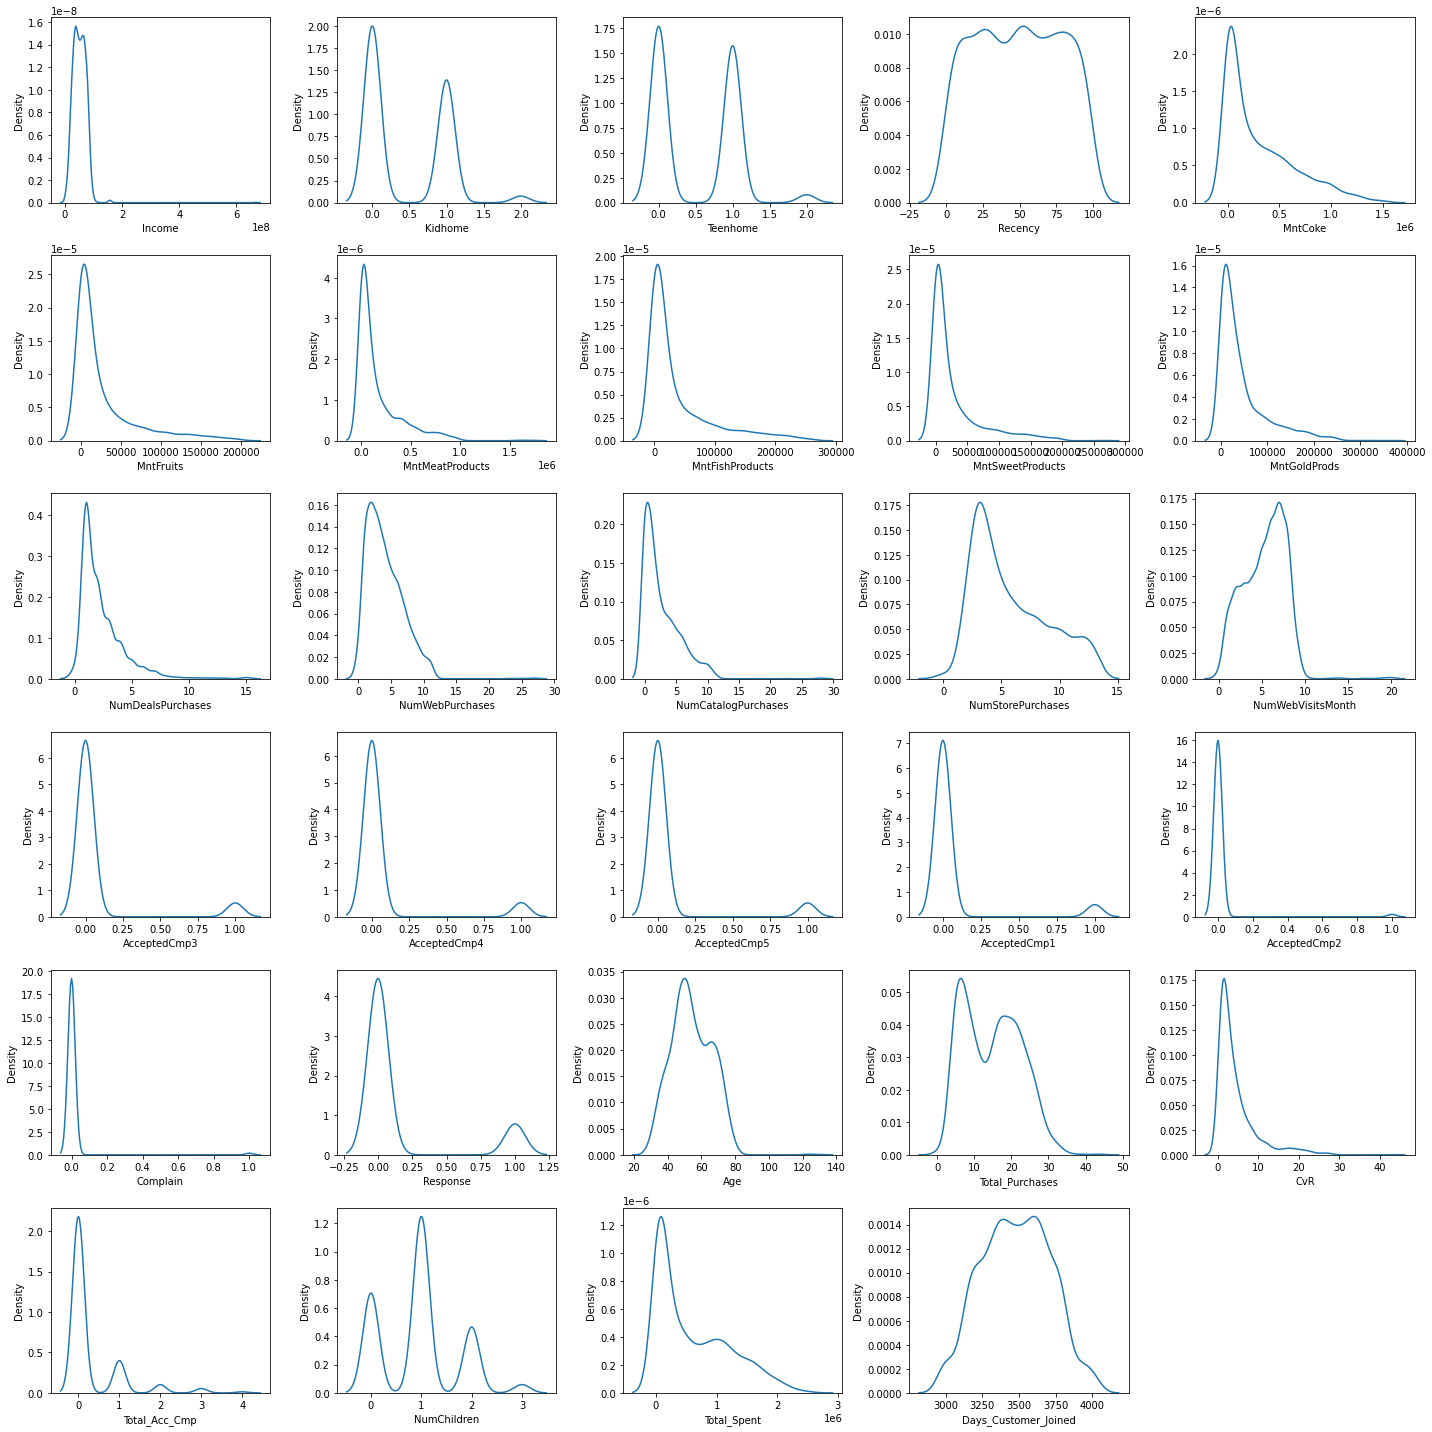

In [ ]:
# Create distribution KDE plot for numerical features

plt.figure(figsize = (20,20))
for i in range (len (num1)):
    plt.subplot(6,5, i+1)
    sns.kdeplot(x = df1[num1[i]])
    plt.tight_layout()

    

There are some features actually categorical.

In [ ]:
# change data type

df1[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Total_Acc_Cmp', 'NumChildren']] = df1[['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Total_Acc_Cmp', 'NumChildren']].astype('object')


In [ ]:
df1.dtypes

Education                       object
Marital_Status                  object
Income                         float64
Kidhome                         object
Teenhome                        object
Dt_Customer             datetime64[ns]
Recency                          int64
MntCoke                          int64
MntFruits                        int64
MntMeatProducts                  int64
MntFishProducts                  int64
MntSweetProducts                 int64
MntGoldProds                     int64
NumDealsPurchases                int64
NumWebPurchases                  int64
NumCatalogPurchases              int64
NumStorePurchases                int64
NumWebVisitsMonth                int64
AcceptedCmp3                    object
AcceptedCmp4                    object
AcceptedCmp5                    object
AcceptedCmp1                    object
AcceptedCmp2                    object
Complain                        object
Response                        object
Age                      

In [ ]:
# grouping features type

num = []
cat = []
date = []

for col in df1.columns:
    if df1[col].dtype == 'O':
        cat.append(col)
    elif df1[col].dtype == 'int64' or df1[col].dtype == 'float64':
        num.append(col)
    else:
        date.append(col)

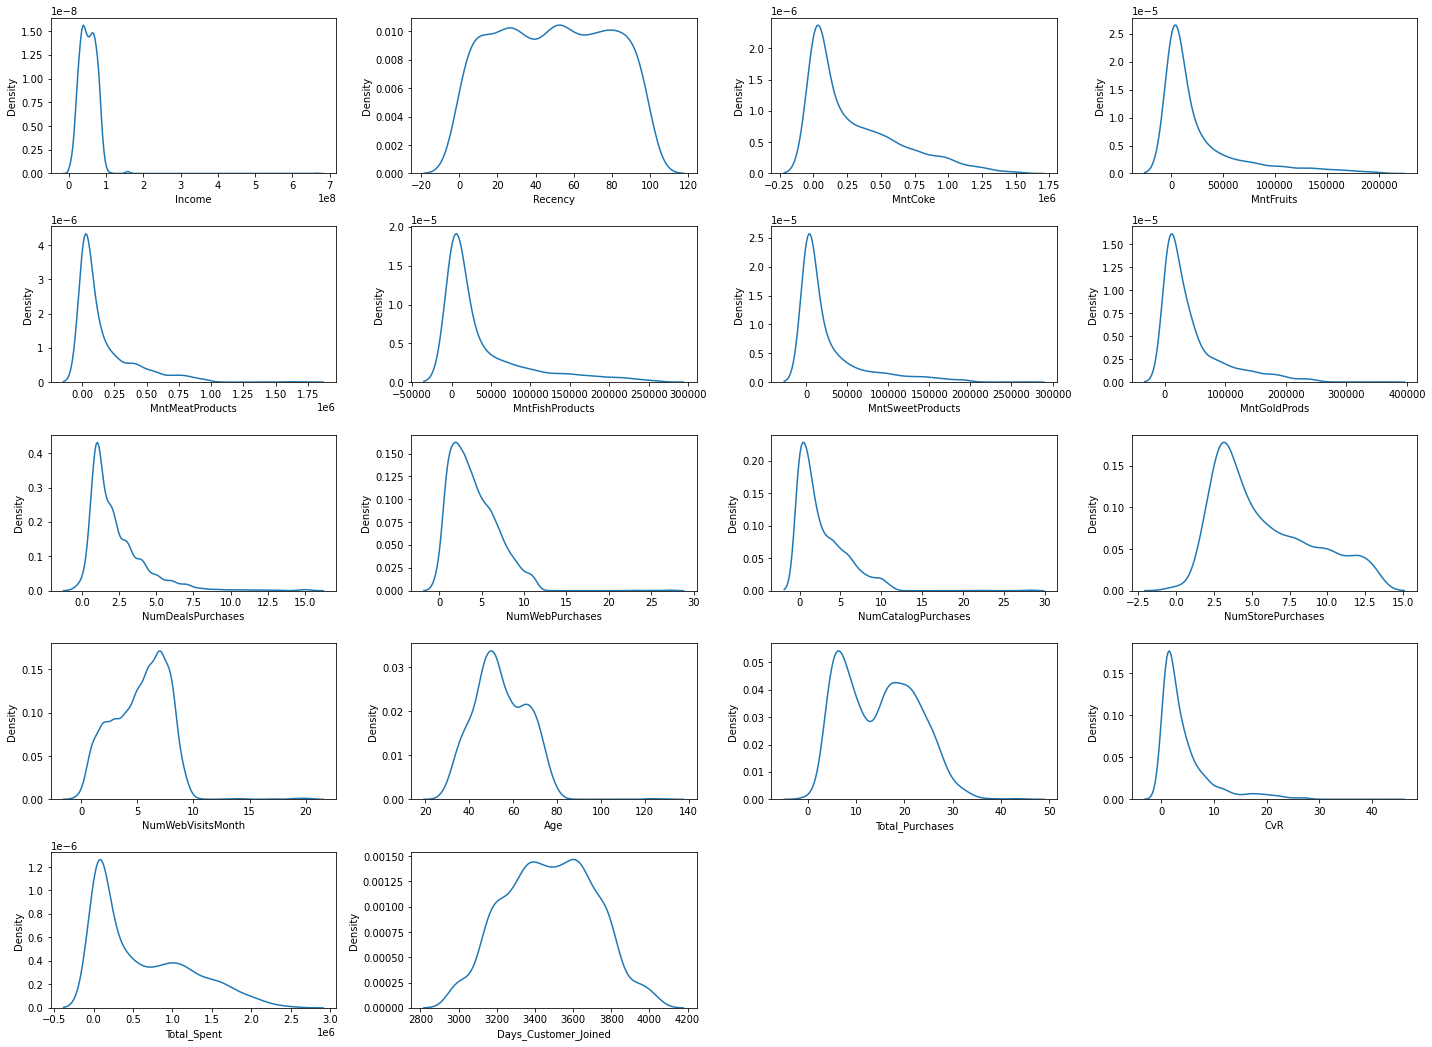

In [ ]:
# create distribution plot for numeric features

plt.figure(figsize = (20,20))
for i in range(len(num)):
    plt.subplot (7, 4, i+1)
    sns.kdeplot(x = df1[num[i]])
    plt.tight_layout()

### B. Boxplot

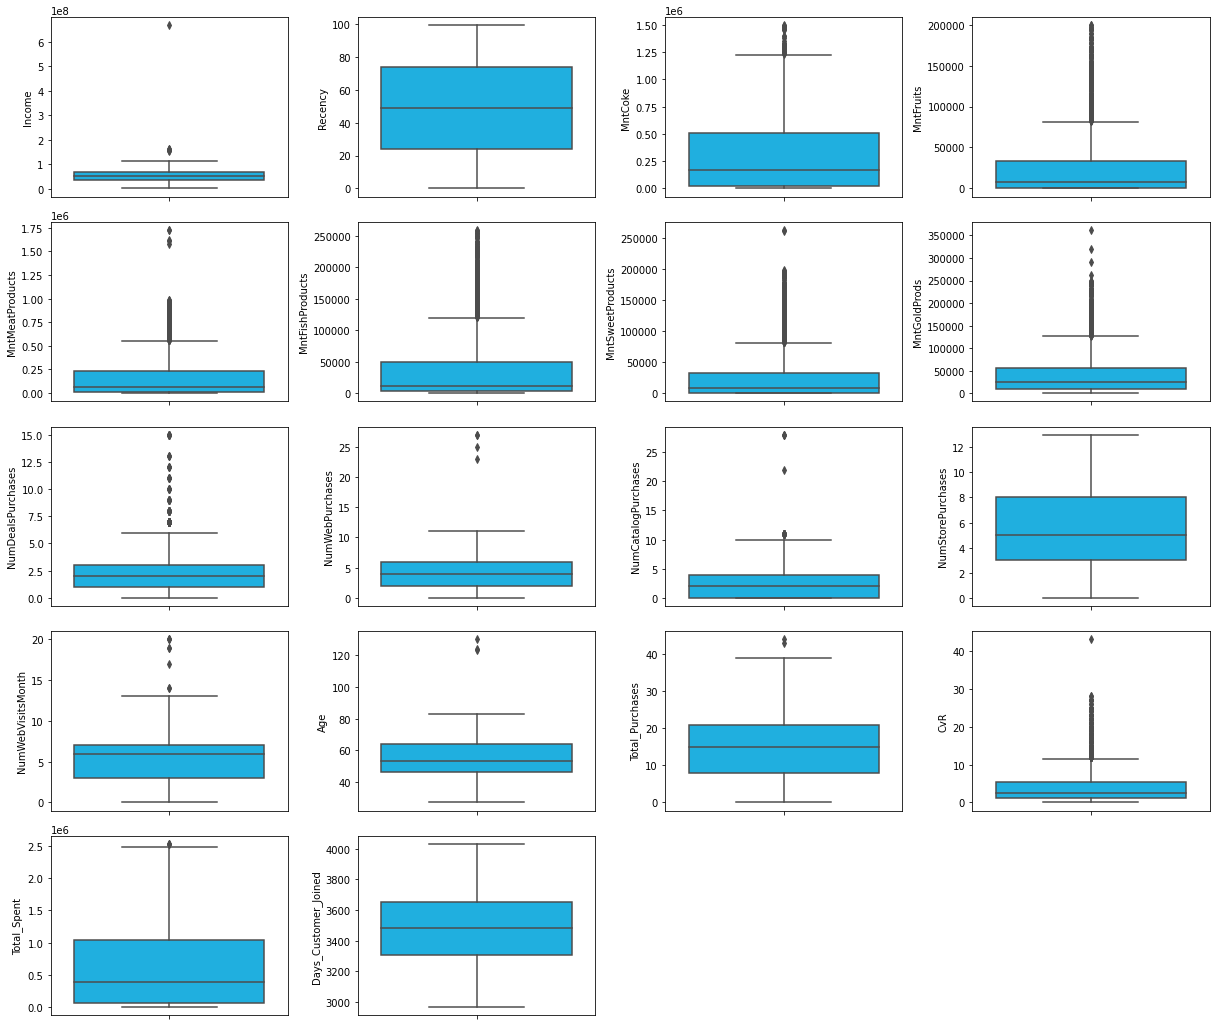

In [ ]:
plt.figure(figsize = (17, 20))
for i in range(0, len(num)):
    plt.subplot(7,4, i+1)
    sns.boxplot(y = df1[num[i]], orient = 'v', color = 'deepskyblue')
    plt.tight_layout()
    

There are some features with outliers

### C. Countplot

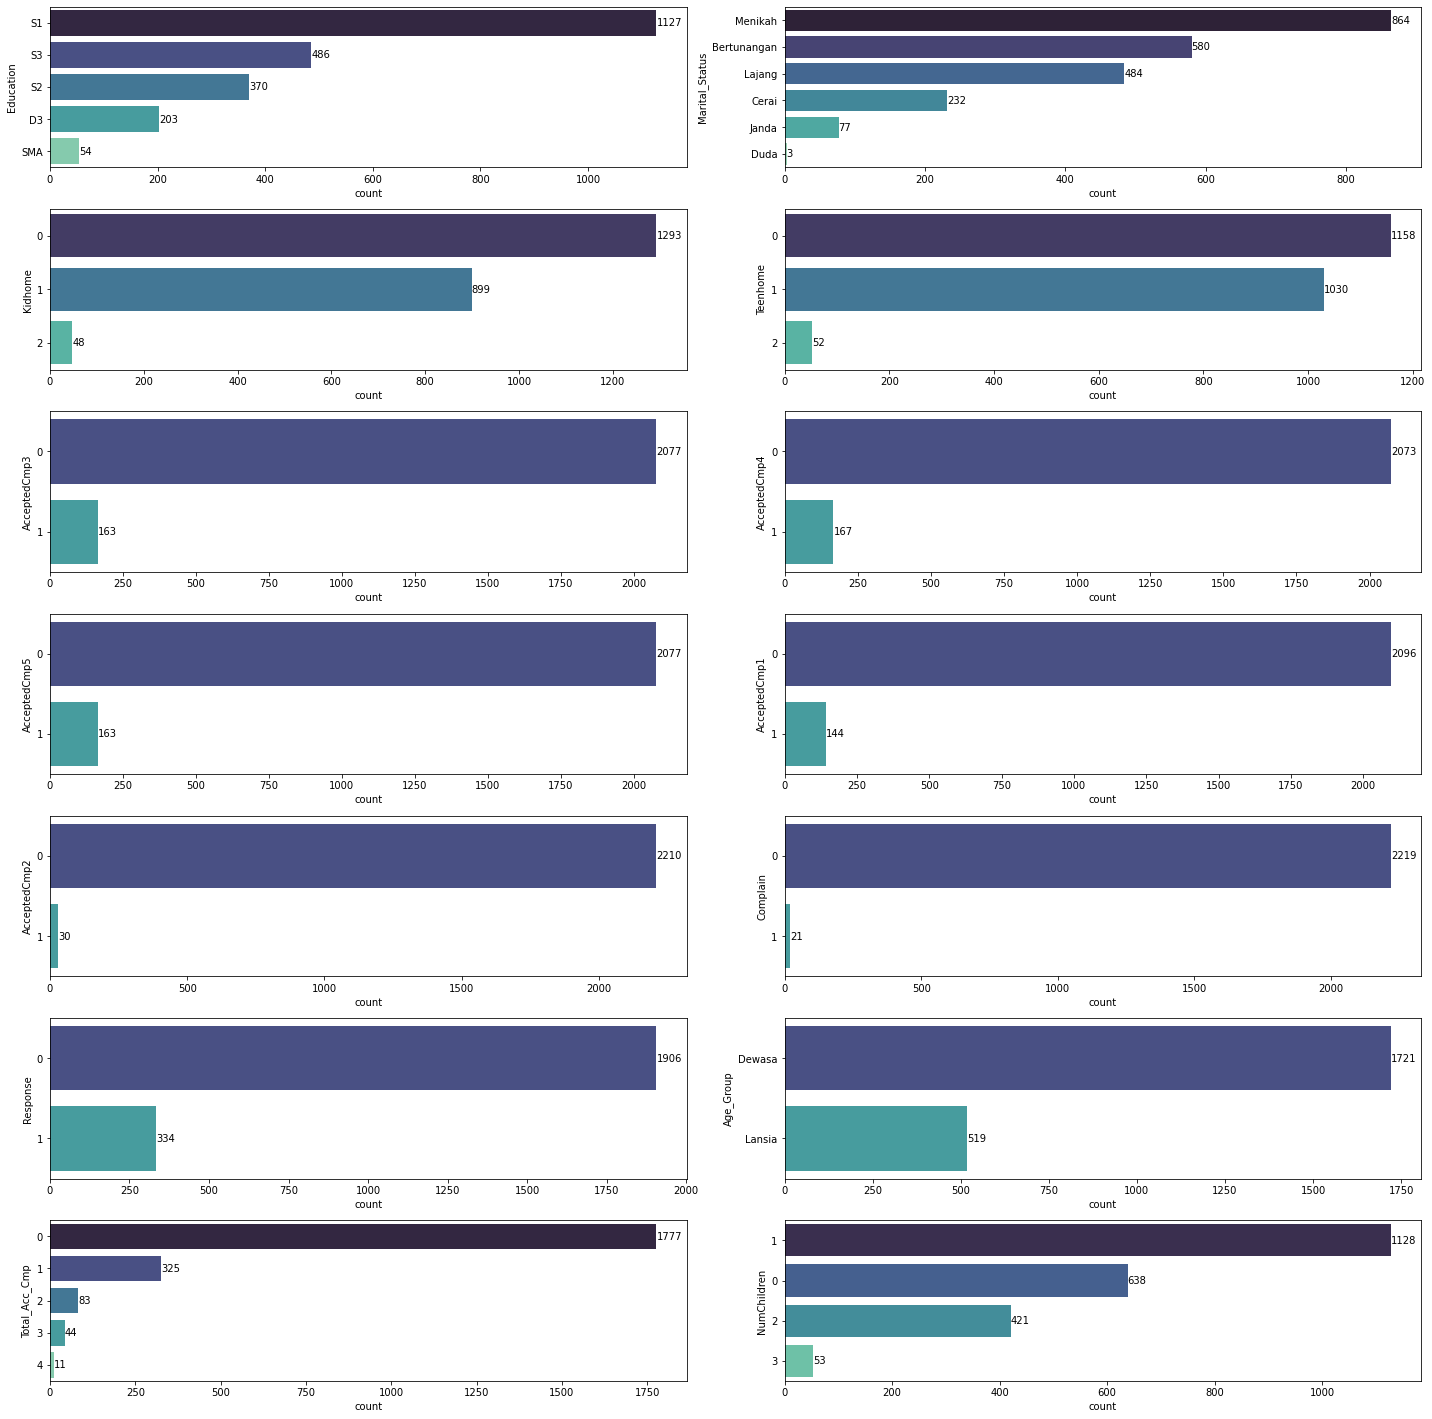

In [ ]:
plt.figure(figsize = (20, 25))
for i in range (len(cat)):
    plt.subplot(9,2, i+1)
    ax = sns.countplot(y = df1[cat[i]], palette = 'mako', order=df1[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()


### D. Datetime Feature

In [ ]:
df1[date].describe()

,Dt_Customer
count,2240
unique,663
top,2012-08-31 00:00:00
freq,12
first,2012-01-08 00:00:00
last,2014-12-06 00:00:00


### E. Multivariate Analysis

#### Heatmap Plot

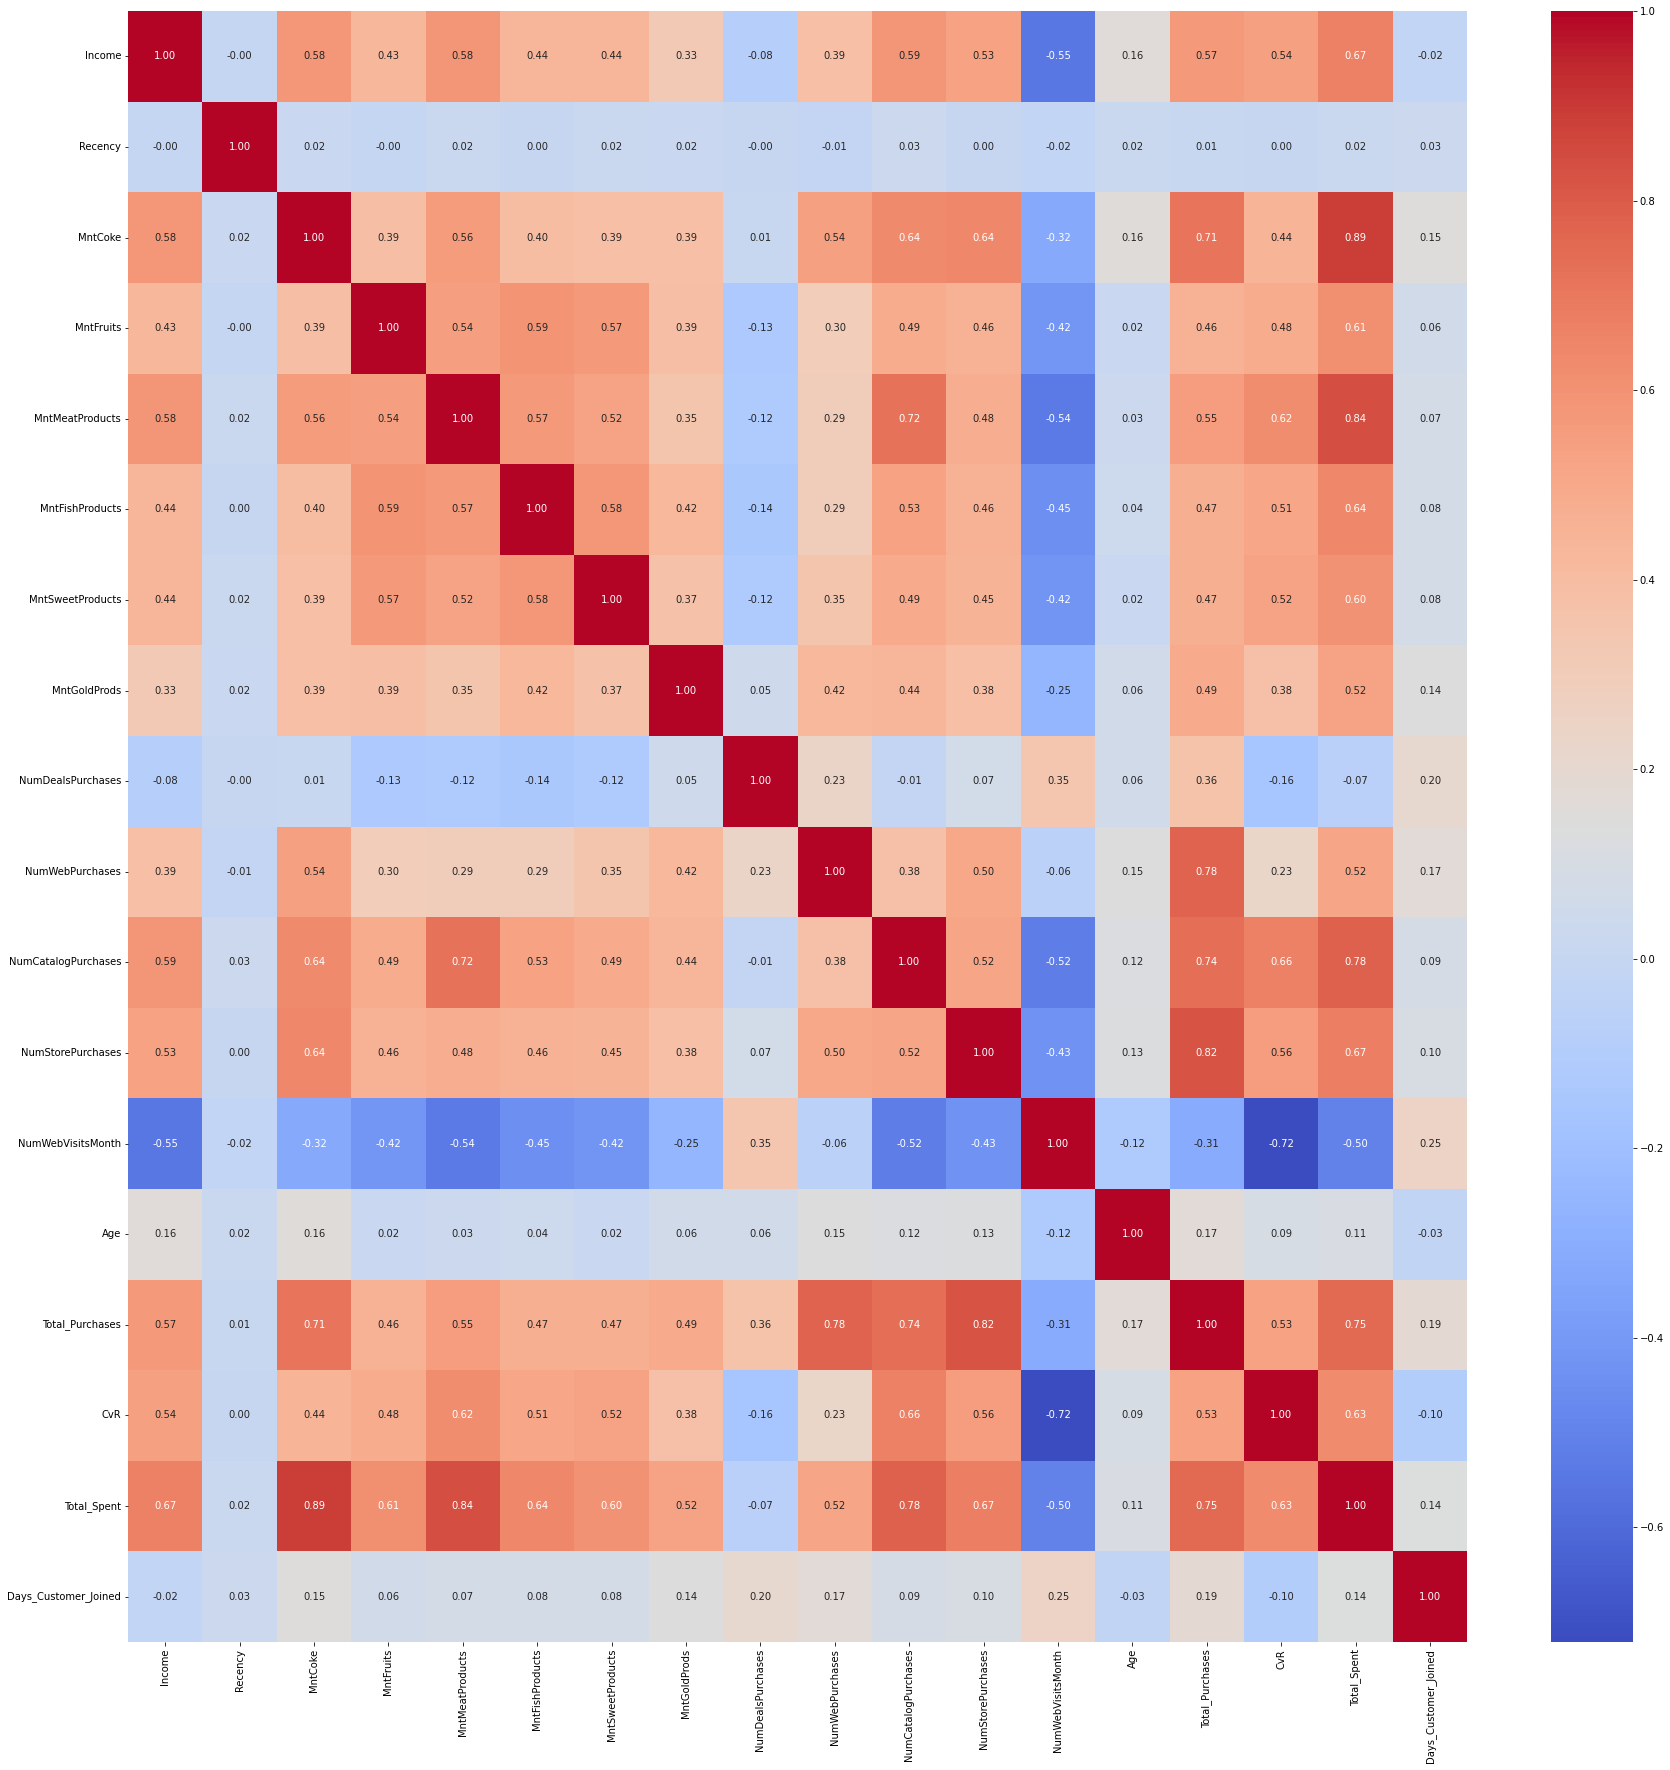

In [ ]:
plt.figure(figsize = (30, 30))
sns.heatmap(df1.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.savefig('heatmap.png')

### F. Analysis

<b> Relation between User Types and Conversion Rate to Campaign Respond </b> 

In [ ]:
df_age = df1.groupby('Age_Group').agg({'CvR' : 'sum'}).reset_index()
df_age

,Age_Group,CvR
0,Dewasa,7040.922181
1,Lansia,2804.375794


In [ ]:
df_age['total_CvR'] = round(df_age['CvR'].sum(),2)

# calculate percentage CvR of each age group
df_age['%CvR'] = round(df_age['CvR']*100/df_age['total_CvR'], 2)

df_age.drop('total_CvR', axis = 1, inplace = True)
df_age

,Age_Group,CvR,%CvR
0,Dewasa,7040.922181,71.52
1,Lansia,2804.375794,28.48


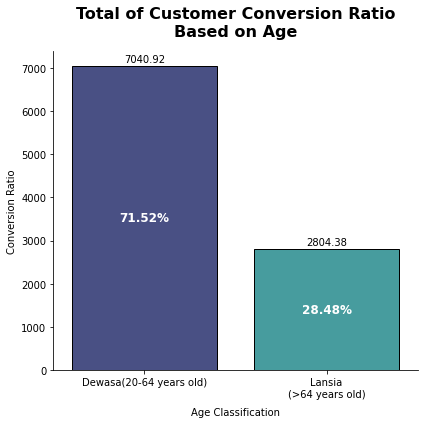

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
plt.title("Total of Customer Conversion Ratio\nBased on Age", fontsize=16, color='black', weight='bold', pad=15)
sns.barplot(x='Age_Group', y='CvR', data=df_age, edgecolor='black', palette='mako')

plt.ylabel('Conversion Ratio')
plt.xlabel('Age Classification', labelpad=8)
plt.xticks(np.arange(2), ['Dewasa(20-64 years old)', 'Lansia\n(>64 years old)'])

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['71.52%', '28.48%'], label_type='center', color='white', weight='bold', size = 12)

sns.despine()
plt.tight_layout()
plt.savefig('customer_cvr.png')

Customer 'Dewasa' relatively have higher conversion rate than the 'Lansia'.

#### Relationship between Income and Total Spending to Conversion Rate.

In [ ]:
# See the min and max values of income and total spent

print('Income min: ', df1['Income'].min())
print('Income max: ', df1['Income'].max())
print('Total spent min: ', df1['Total_Spent'].min())
print('Total spent max: ', df1['Total_Spent'].max())

Income min:  1730000.0
Income max:  666666000.0
Total spent min:  5000
Total spent max:  2525000


In [ ]:
# categorizing income

list_income = []

for i in df1['Income']:
    if i < 2000000:
        income = '0-2 juta'
    elif i < 6000000: 
        income = '2-6 juta'
    elif i < 15000000:
        income = '6-15 juta'
    elif i > 15000000:
        income = '> 15 juta'
    else:
        pass
    list_income.append(income)
    
df1['Income_Group'] = list_income
    
        

In [ ]:
# categorizing total_spent

list_spent = []

for i in df1['Total_Spent']:
    if i < 100000:
        spent = '< 100k'
    elif i < 500000:
        spent = '100-500k'
    elif i < 1000000:
        spent = '500k-1jt'    
    elif i > 1000000:
        spent = '>1jt'
    else:
        pass
    list_spent.append(spent)
    
df1['Spending_Group'] = list_spent
    

In [ ]:
# create income_group aggregation

df_income = df1.groupby('Income_Group').agg({'CvR' : 'sum'}).reset_index()
df_income['total_CvR'] = round(df_income['CvR'].sum(),2)

# calculate percentage CvR of each income group
df_income['%CvR'] = round(df_income['CvR']*100/df_income['total_CvR'], 2)
df_income.drop('total_CvR', axis = 1, inplace = True)
df_income

,Income_Group,CvR,%CvR
0,0-2 juta,0.750000,0.01
1,2-6 juta,69.537825,0.71
2,6-15 juta,45.157371,0.46
3,> 15 juta,9729.852778,98.83


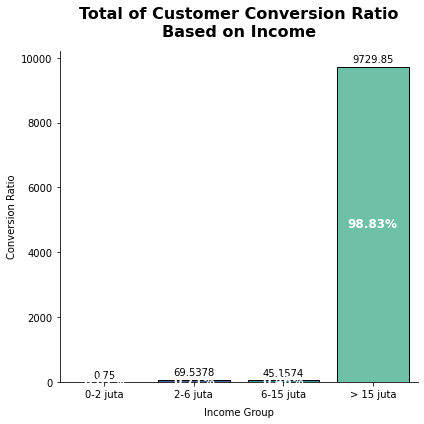

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
plt.title("Total of Customer Conversion Ratio\nBased on Income", fontsize=16, color='black', weight='bold', pad=15)
sns.barplot(x='Income_Group', y='CvR', data=df_income, edgecolor='black', palette='mako')

plt.ylabel('Conversion Ratio')
plt.xlabel('Income Group', labelpad=8)
plt.xticks(np.arange(4), ['0-2 juta', '2-6 juta', '6-15 juta', '> 15 juta'])

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['0.01%', '0.71%', '0.46%', '98.83%'], label_type='center', color='white', weight='bold', size = 12)

sns.despine()
plt.tight_layout()
plt.savefig('customer_income_cvr.png')

In [ ]:
# create 'total_spent' aggregation table
df_spend = df1.groupby('Spending_Group').agg({'CvR' : 'sum'}).reset_index()
df_spend['total_CvR'] = round(df_spend['CvR'].sum(),2)

# calculate percentage CvR of each total spend group
df_spend['%CvR'] = round(df_spend['CvR']*100/df_spend['total_CvR'], 2)
df_spend.drop('total_CvR', axis = 1, inplace = True)
df_spend

,Spending_Group,CvR,%CvR
0,100-500k,1400.200229,14.22
1,500k-1jt,2429.183730,24.67
2,< 100k,774.070762,7.86
3,>1jt,5241.843254,53.24


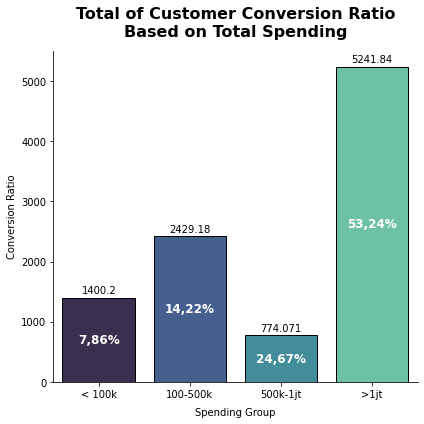

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
plt.title("Total of Customer Conversion Ratio\nBased on Total Spending", fontsize=16, color='black', weight='bold', pad=15)
sns.barplot(x='Spending_Group', y='CvR', data=df_spend, edgecolor='black', palette='mako')

plt.ylabel('Conversion Ratio')
plt.xlabel('Spending Group', labelpad=8)
plt.xticks(np.arange(4), ['< 100k', '100-500k', '500k-1jt', '>1jt'])

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['7,86%', '14,22%', '24,67%', '53,24%'], label_type='center', color='white', weight='bold', size = 12)

sns.despine()
plt.tight_layout()
plt.savefig('customer_spend_cvr.png')

## 2. Data Pre-Processing

### A. Missing Values Handling

In [ ]:
# check percentage

missing_income = df1['Income'].isna().sum() * 100 / len(df)
print('missing values in income: ', df1['Income'].isna().sum(), 'or about', round(missing_income, 4),  '% of total rows')

missing values in income:  0 or about 0.0 % of total rows


In [ ]:
# fill missing values in income with median

df1['Income'].fillna(df1['Income'].median(),inplace = True )

# check
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### B. Duplicated Rows Handling

In [ ]:
df1.duplicated().sum()

183

We dont remove the duplicated rows.

### C. Drop Unnecessary Features

In [ ]:
df1.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                'MntCoke','MntFishProducts','MntFruits','MntMeatProducts','MntSweetProducts', 'MntGoldProds',
                'Kidhome','Teenhome', 'Response'], inplace = True, axis =1)

df1.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Age,Age_Group,Total_Purchases,CvR,Total_Acc_Cmp,NumChildren,Total_Spent,Days_Customer_Joined,Income_Group,Spending_Group
0,S1,Lajang,58138000.0,2012-04-09,58,7,0,66,Lansia,25,3.571429,0,0,1617000,3938,> 15 juta,>1jt
1,S1,Lajang,46344000.0,2014-08-03,38,5,0,69,Lansia,6,1.200000,0,2,27000,3092,> 15 juta,< 100k
2,S1,Bertunangan,71613000.0,2013-08-21,26,4,0,58,Dewasa,21,5.250000,0,0,776000,3439,> 15 juta,500k-1jt
3,S1,Bertunangan,26646000.0,2014-10-02,26,6,0,39,Dewasa,8,1.333333,0,1,53000,3032,> 15 juta,< 100k
4,S3,Menikah,58293000.0,2014-01-19,94,5,0,42,Dewasa,19,3.800000,0,1,422000,3288,> 15 juta,100-500k


### D. Feature Selection

Using RFMLC, we choose these 5 features:
1. **Recency** : Recency
2. **Frequency** : Total_Purchase
3. **Monetary** : Total_Spent
4. **Loyalty** : Dt_Days_Customer
5. **C**: Age

In [ ]:
# create RFMLC dataset

df_final = df1[['Recency', 'Total_Purchases', 'Total_Spent', 'Days_Customer_Joined', 'Age']]
df_final.columns = ['R', 'F', 'M', 'L', 'C']
df_final.head()

,R,F,M,L,C
0,58,25,1617000,3938,66
1,38,6,27000,3092,69
2,26,21,776000,3439,58
3,26,8,53000,3032,39
4,94,19,422000,3288,42


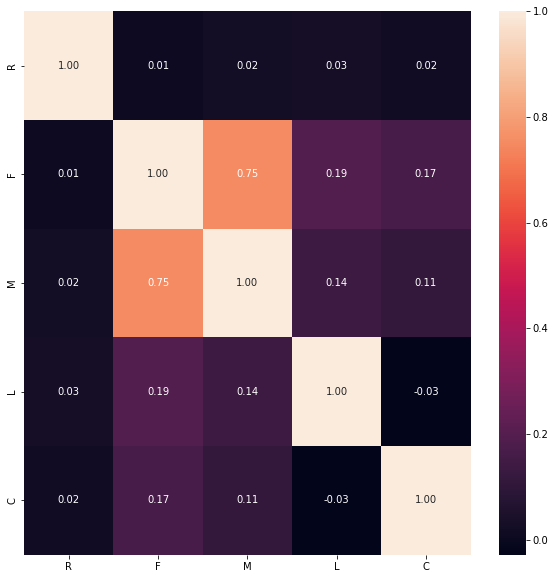

In [ ]:
# Check Heatmap

plt.figure(figsize = (10,10))
sns.heatmap(df_final.corr(), annot = True, fmt = '.2f')
plt.savefig('heatmap_final.png')

### E. Outlier Handling

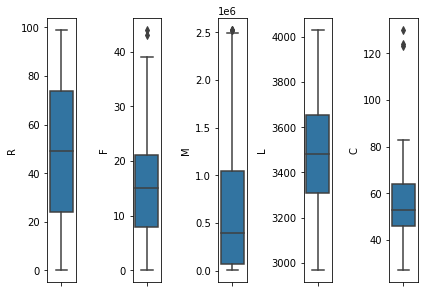

In [ ]:
cols = df_final.columns

plt.figure(figsize=(6,8))
for i in range(len(cols)):
    plt.subplot(2,5, i+1)
    sns.boxplot(y=df_final[cols[i]])
    plt.tight_layout()

In [ ]:
# Remove outlier outside IQR

print('Number of rows before outlier handling with IQR: ', df_final.shape[0])

filtered_entries = np.array([True] * len(df_final))
for i in df_final.columns:
    Q1 = df_final[i].quantile(0.25)
    Q3 = df_final[i].quantile(0.75)
    IQR = Q3 -Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    filtered_entries = ((df_final[i] >= low_limit) & (df_final[i] <= high_limit)) & filtered_entries
    
df_final = df_final[filtered_entries]

print('Number of rows after outlier handling with IQR: ', df_final.shape[0])    

Number of rows before outlier handling with IQR:  2240
Number of rows after outlier handling with IQR:  2232


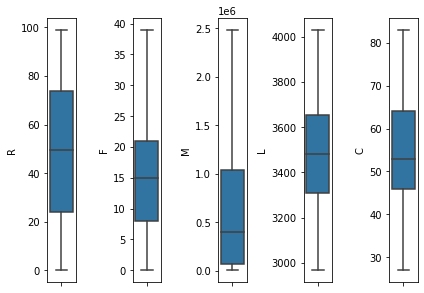

In [ ]:
# check new boxplot

cols = df_final.columns

plt.figure(figsize=(6,8))
for i in range(len(cols)):
    plt.subplot(2,5, i+1)
    sns.boxplot(y=df_final[cols[i]])
    plt.tight_layout()

### F. Log Transformation

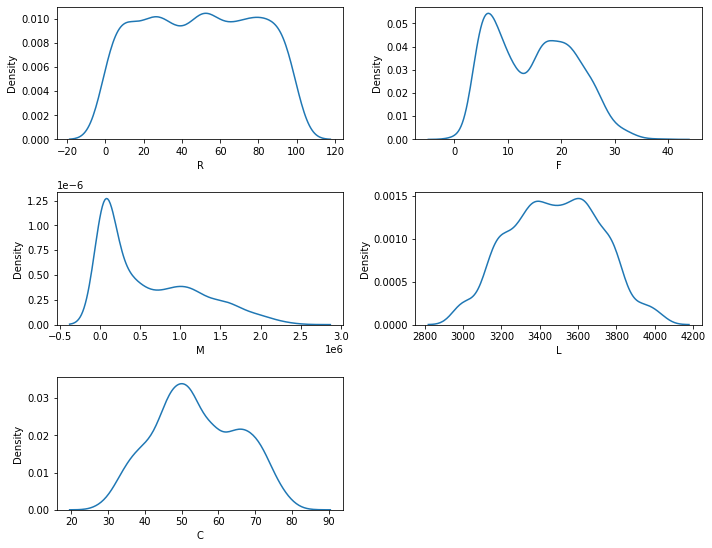

In [ ]:
# look at the kda plot

cols = df_final.columns

plt.figure(figsize=(10,15))
for i in range(len(cols)):
    plt.subplot (6,2,i+1)
    sns.kdeplot(x=df_final[cols[i]])
    plt.tight_layout()

column M distribution is right-skewed

In [ ]:
df_final_log = df_final.copy()
df_final_log['M'] = np.log(df_final_log['M'])
df_final_log.head()

,R,F,M,L,C
0,58,25,14.296083,3938,66
1,38,6,10.203592,3092,69
2,26,21,13.561908,3439,58
3,26,8,10.878047,3032,39
4,94,19,12.952761,3288,42


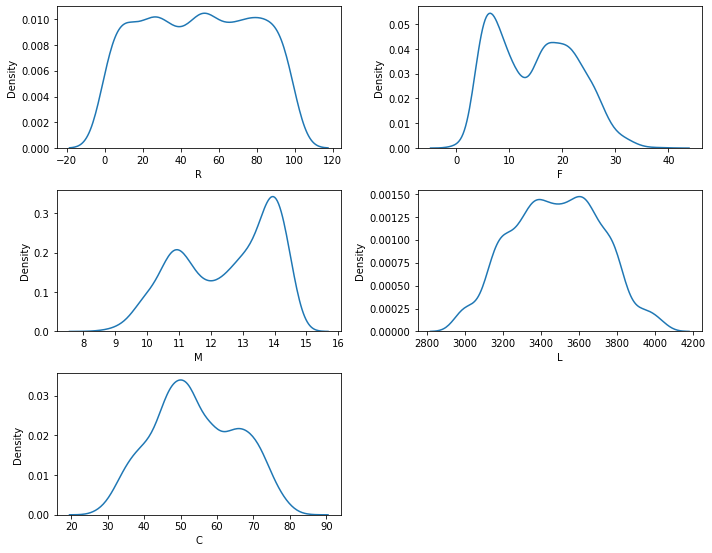

In [ ]:
# look at the kda plot

cols = df_final_log.columns
plt.figure(figsize=(10,15))
for i in range(len(cols)):
    plt.subplot (6,2,i+1)
    sns.kdeplot(x=df_final_log[cols[i]])
    plt.tight_layout()

### G. Standardization

In [ ]:
# check the summary statistics

df_final_log.describe()

,R,F,M,L,C
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,49.132616,14.836022,12.514056,3479.225806,54.137097
std,28.974453,7.630707,1.481460,232.246766,11.684023
min,0.000000,0.000000,8.517193,2967.000000,27.000000
25%,24.000000,8.000000,11.138212,3308.000000,46.000000
50%,49.500000,15.000000,12.887905,3480.000000,53.000000
75%,74.000000,21.000000,13.855212,3653.000000,64.000000
max,99.000000,39.000000,14.726186,4030.000000,83.000000


In [ ]:
# standardization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_std = MinMaxScaler().fit_transform(df_final_log)
df_std = pd.DataFrame(df_std, columns=['R', 'F', 'M', 'L', 'C'])
df_std.sample(10)

,R,F,M,L,C
502,0.777778,0.615385,0.844219,0.622766,0.357143
1554,0.666667,0.538462,0.727563,0.568203,0.357143
511,0.474747,0.564103,0.971978,0.565381,0.375000
1112,0.242424,0.307692,0.715897,0.415804,0.232143
2091,0.676768,0.256410,0.904736,0.693321,0.375000
1083,0.777778,0.102564,0.245782,0.259643,0.232143
88,0.797980,0.256410,0.589213,0.300094,0.517857
1395,0.545455,0.538462,0.811026,0.237065,0.428571
2005,0.929293,0.692308,0.825057,0.637817,0.267857
670,0.636364,0.410256,0.851711,0.996237,0.375000


In [ ]:
# recheck the summary statistics

df_std.describe()

,R,F,M,L,C
count,2232.000000,2232.000000,2232.000000,2232.000000,2232.000000
mean,0.496289,0.380411,0.643722,0.481868,0.484591
std,0.292671,0.195659,0.238599,0.218482,0.208643
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242424,0.205128,0.422133,0.320790,0.339286
50%,0.500000,0.384615,0.703933,0.482596,0.464286
75%,0.747475,0.538462,0.859724,0.645343,0.660714
max,1.000000,1.000000,1.000000,1.000000,1.000000


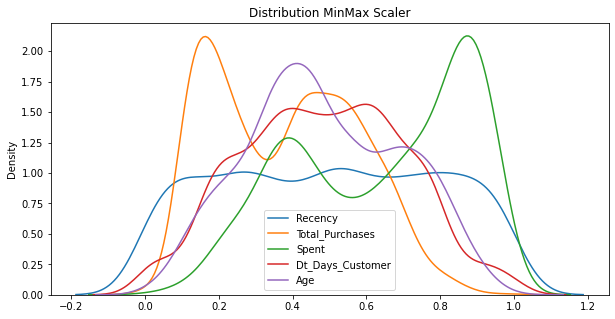

In [ ]:
# see the plot

plt.figure(figsize=(10, 5))
plt.title('Distribution MinMax Scaler')
sns.kdeplot(df_std['R'], label = 'Recency')
sns.kdeplot(df_std['F'], label = 'Total_Purchases')
sns.kdeplot(df_std['M'], label = 'Spent')
sns.kdeplot(df_std['L'], label = 'Dt_Days_Customer')
sns.kdeplot(df_std['C'], label = 'Age')
plt.xlabel(None)
plt.legend()
plt.show()

## 3. Modelling

### Inertia

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

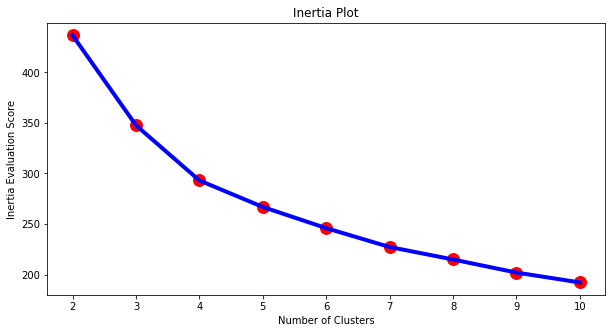

In [ ]:
# plot the inertia

plt.figure(figsize=(10,5))
plt.title('Inertia Plot', fontsize = 12)
sns.lineplot(x=range(2,11), y = inertia, color = 'blue', linewidth = 4)
sns.scatterplot(x=range(2,11), y = inertia, color = 'red', s= 200)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Evaluation Score')
plt.show()

Choose number of clusters = 4

In [ ]:
df_std_cluster = df_std.copy()
df_cluster = df_final.copy()

# n_cluster = 4
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_std_cluster)

# fit model
kc = kmeans.fit(df_std_cluster)

In [ ]:
# labeling dataset
df_std_cluster['clusters'] = kmeans.labels_
df_cluster['clusters'] = kmeans.labels_

In [ ]:
df_cluster.head()

,R,F,M,L,C,clusters
0,58,25,1617000,3938,66,1
1,38,6,27000,3092,69,0
2,26,21,776000,3439,58,3
3,26,8,53000,3032,39,0
4,94,19,422000,3288,42,1


In [ ]:
# check value counts of clusters

df_cluster['clusters'].value_counts()

1    654
3    607
0    492
2    479
Name: clusters, dtype: int64

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)
pca.fit(df_std)
pcs = pca.transform(df_std)

In [ ]:
# create the dataframe

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'  ])
df_pca['clusters'] = df_cluster['clusters']
df_pca.head(5)

,PC 1,PC 2,clusters
0,-0.523091,0.000694,1.0
1,0.454420,0.027936,0.0
2,-0.173306,0.276273,3.0
3,0.494513,0.153435,0.0
4,-0.114915,-0.428065,1.0


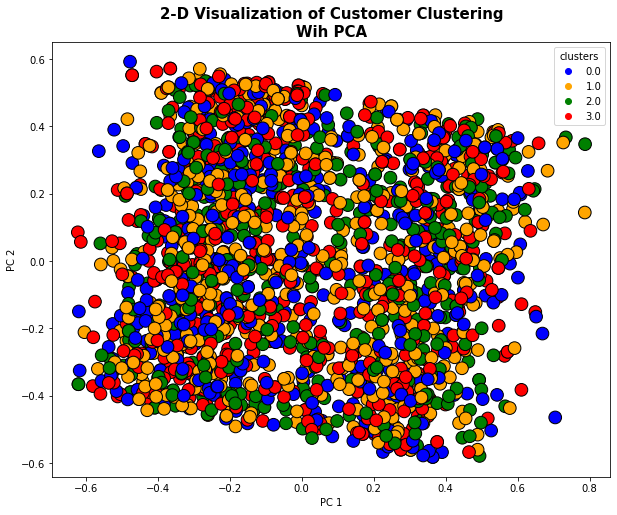

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clustering\nWih PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    data=df_pca,
    palette=['blue','orange','green','red'],
    s=160,
    ax=ax
);


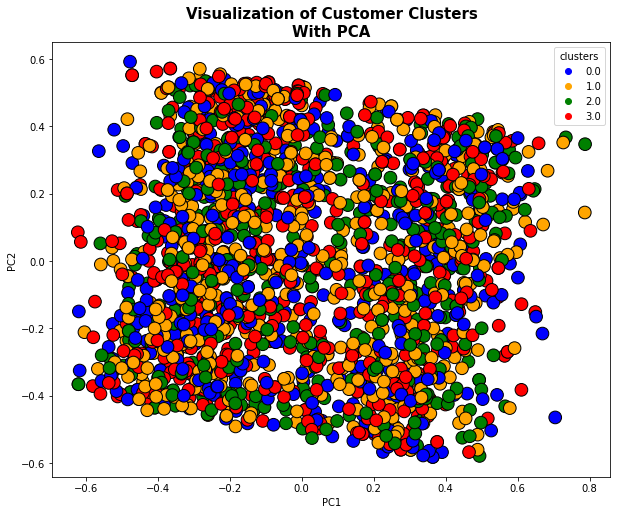

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Visualization of Customer Clusters\nWith PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC1", y="PC2",
    hue="clusters",
    edgecolor='black',
    #linestyle='--',
    data=df_pca,
    palette=['blue','orange','green','red'],
    s=160,
    ax=ax
);

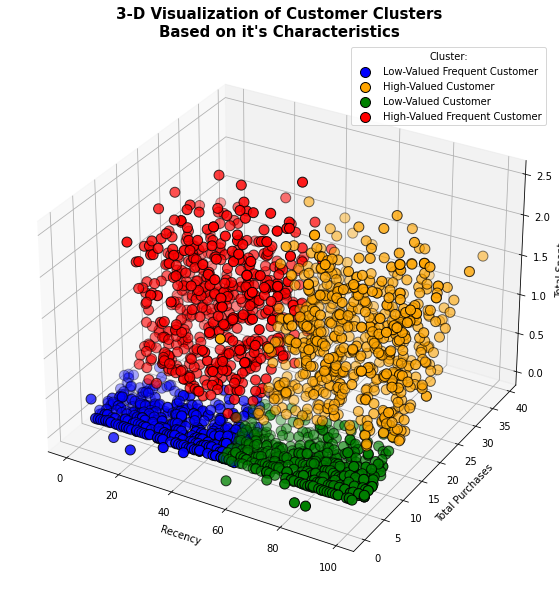

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=15, weight='bold')
ax.scatter(df_cluster['R'][df_cluster.clusters == 0], df_cluster['F'][df_cluster.clusters == 0], df_cluster['M'][df_cluster.clusters == 0], c='blue', s=100, edgecolor='black', label='Low-Valued Frequent Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 1], df_cluster['F'][df_cluster.clusters == 1], df_cluster['M'][df_cluster.clusters == 1], c='orange', s=100, edgecolor='black', label='High-Valued Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 2], df_cluster['F'][df_cluster.clusters == 2], df_cluster['M'][df_cluster.clusters == 2], c='green', s=100, edgecolor='black', label='Low-Valued Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 3], df_cluster['F'][df_cluster.clusters == 3], df_cluster['M'][df_cluster.clusters == 3], c='red', s=100, edgecolor='black', label='High-Valued Frequent Customer')
plt.xlabel('Recency')
plt.ylabel('Total Purchases')
ax.set_zlabel('Total Spent')
plt.legend(title='Cluster:')
plt.show()

## Model Insights

### A. Distribution

In [ ]:
df_cluster.groupby('clusters').agg(['mean','median', 'max', 'min']).T

clusters              0             1              2             3
R mean        24.851626  7.278899e+01      75.079332  2.285008e+01
  median      25.000000  7.200000e+01      77.000000  2.300000e+01
  max         53.000000  9.900000e+01      99.000000  4.900000e+01
  min          0.000000  4.700000e+01      45.000000  0.000000e+00
F mean         7.168699  2.059480e+01       7.651357  2.051565e+01
  median       7.000000  2.000000e+01       7.000000  2.000000e+01
  max         17.000000  3.900000e+01      16.000000  3.500000e+01
  min          0.000000  1.000000e+00       0.000000  1.000000e+01
M mean     75406.504065  1.021953e+06   91129.436326  9.800972e+05
  median   57000.000000  9.785000e+05   65000.000000  9.280000e+05
  max     393000.000000  2.440000e+06  414000.000000  2.486000e+06
  min       6000.000000  1.520000e+05    5000.000000  1.520000e+05
L mean      3431.221545  3.529697e+03    3429.972860  3.502623e+03
  median    3412.000000  3.535000e+03    3430.000000  3.516000e+03
  max       4030.000000  4.030000e+03    4030.000000  4.028000e+03
  min       2967.000000  2.968000e+03    2970.000000  2.968000e+03
C mean        49.806911  5.686697e+01      52.764092  5.578913e+01
  median      49.000000  5.700000e+01      52.000000  5.500000e+01
  max         78.000000  8.200000e+01      83.000000  7.900000e+01
  min         27.000000  2.800000e+01      27.000000  2.800000e+01

In [ ]:
# create cluster aggregation

df_aggcluster = df_cluster.groupby('clusters').agg({'R':'count'}).reset_index()
df_aggcluster = df_aggcluster.rename(columns={'R':'total_customers'})
df_aggcluster['sum_customers'] = df_aggcluster['total_customers'].sum()
df_aggcluster['pct'] = round((df_aggcluster['total_customers']/df_aggcluster['sum_customers'])*100, 2)
df_aggcluster.drop('sum_customers', inplace = True, axis =1)

In [ ]:
df_aggcluster

,clusters,total_customers,pct
0,0,492,22.04
1,1,654,29.30
2,2,479,21.46
3,3,607,27.20


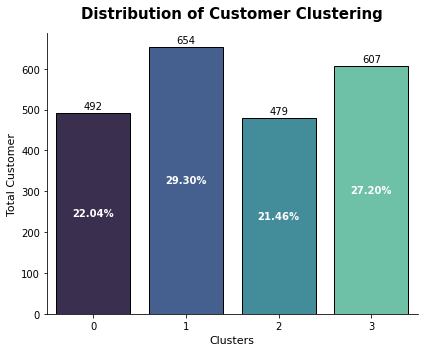

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.title("Distribution of Customer Clustering", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='clusters', y='total_customers', data= df_aggcluster, edgecolor='black', palette='mako')

plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['22.04%', '29.30%', '21.46%', '27.20%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()

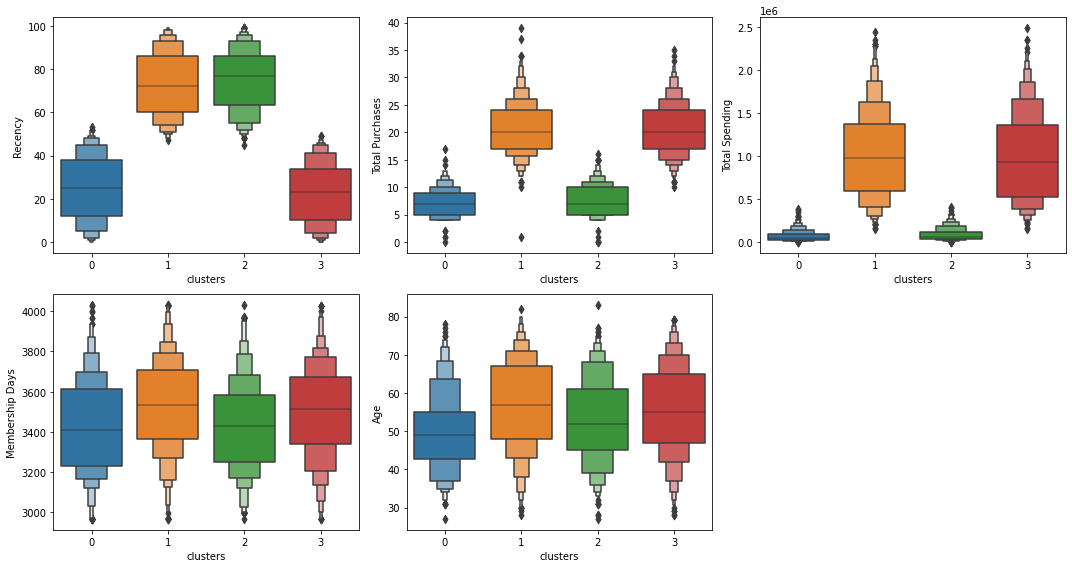

In [ ]:
df_clust = df_cluster.copy()
df_clust.rename(columns={'R':'Recency','F':'Total Purchases','M':'Total Spending','L':'Membership Days','C':'Age'}, inplace=True)
clust = df_clust.columns.drop('clusters')

plt.figure(figsize= (15, 8))
for i in range(len(clust)):
    plt.subplot(2, 3, i+1)
    sns.boxenplot(x=df_clust['clusters'], y=df_clust[clust[i]])
    plt.tight_layout()

In [ ]:
df_final['Clusters'] = kmeans.labels_
df_final.head()

,R,F,M,L,C,Clusters
0,58,25,1617000,3938,66,1
1,38,6,27000,3092,69,0
2,26,21,776000,3439,58,3
3,26,8,53000,3032,39,0
4,94,19,422000,3288,42,1


In [ ]:
# create 'Age_Group' in df_final
age_list = []

for i in df_final['C']:
    if i <= 12:
        group = 'Anak-Anak'
    elif i <= 20:
        group = 'Remaja'
    elif i <= 64:
        group = 'Dewasa'
    else:
        group = 'Lansia'
    age_list.append(group)
    
df_final['Age_Group'] = age_list
df_final.head()

,R,F,M,L,C,Clusters,Age_Group
0,58,25,1617000,3938,66,1,Lansia
1,38,6,27000,3092,69,0,Lansia
2,26,21,776000,3439,58,3,Dewasa
3,26,8,53000,3032,39,0,Dewasa
4,94,19,422000,3288,42,1,Dewasa


In [ ]:
# create pivot table K-Cluster aggregation

pivot_cluster =  df_final.groupby('Clusters').agg({'L': ['mean','median'],
                                                     'R': ['mean','median'],
                                                     'F': ['mean','median'],
                                                     'M': ['mean','median'],
                                                     'C': ['mean','median']}).reset_index()

In [ ]:
pivot_cluster.T

0             1             2              3
Clusters             0.000000  1.000000e+00      2.000000       3.000000
L        mean     3431.221545  3.529697e+03   3429.972860    3502.622735
         median   3412.000000  3.535000e+03   3430.000000    3516.000000
R        mean       24.851626  7.278899e+01     75.079332      22.850082
         median     25.000000  7.200000e+01     77.000000      23.000000
F        mean        7.168699  2.059480e+01      7.651357      20.515651
         median      7.000000  2.000000e+01      7.000000      20.000000
M        mean    75406.504065  1.021953e+06  91129.436326  980097.199341
         median  57000.000000  9.785000e+05  65000.000000  928000.000000
C        mean       49.806911  5.686697e+01     52.764092      55.789127
         median     49.000000  5.700000e+01     52.000000      55.000000

In [ ]:
df_final.head()

,R,F,M,L,C,Clusters,Age_Group
0,58,25,1617000,3938,66,1,Lansia
1,38,6,27000,3092,69,0,Lansia
2,26,21,776000,3439,58,3,Dewasa
3,26,8,53000,3032,39,0,Dewasa
4,94,19,422000,3288,42,1,Dewasa


In [ ]:
df_age_clust = df_final.groupby(['Clusters', 'Age_Group']).agg({'R':'count'}).reset_index()
df_age_clust = df_age_clust.rename(columns={'R':'total_customers'})
df_age_clust['sum_customers'] = df_age_clust['total_customers'].sum()
df_age_clust['pct'] = round((df_age_clust['total_customers']/df_age_clust['sum_customers'])*100, 2)
df_age_clust

,Clusters,Age_Group,total_customers,sum_customers,pct
0,0,Dewasa,437,2232,19.58
1,0,Lansia,55,2232,2.46
2,1,Dewasa,446,2232,19.98
3,1,Lansia,208,2232,9.32
4,2,Dewasa,392,2232,17.56
5,2,Lansia,87,2232,3.90
6,3,Dewasa,441,2232,19.76
7,3,Lansia,166,2232,7.44


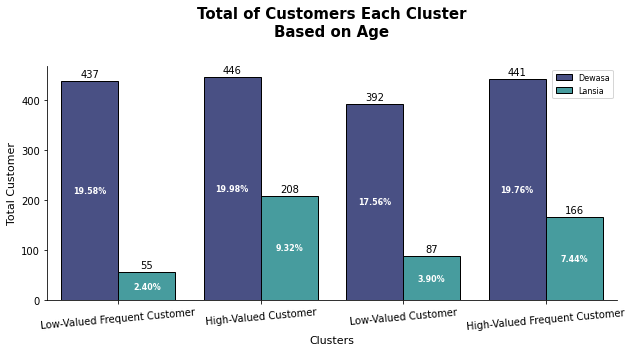

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
plt.title("Total of Customers Each Cluster\nBased on Age", fontsize=15, color='black', weight='bold', pad=30)
sns.barplot(x='Clusters', y='total_customers', data=df_age_clust, hue='Age_Group', edgecolor='black', palette='mako')
plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)
plt.bar_label(ax.containers[0], ['19.58%', '19.98%', '17.56%', '19.76%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[1], ['2.40%', '9.32%', '3.90%', '7.44%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.xticks(np.arange(4), ['Low-Valued Frequent Customer', 'High-Valued Customer', 'Low-Valued Customer', 'High-Valued Frequent Customer'], rotation=5)
plt.legend(prop={'size':8}, loc='best')
sns.despine()
plt.tight_layout()
plt.show()